In [118]:
#Importing all the Needed Python packages 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyp 
import scipy.stats as sts
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import pickle 

sns.set(color_codes = True)
%matplotlib inline

#### 1. Data Understanding & Exploration: [5 Marks]

A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable. [1 Mark]

B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable. [1 Mark]

C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame [2 Mark]

D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python. [1 Marks]

##### 1A)  Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable. [1 Mark]
Solution 1A:

In [119]:
Teldf1 = pd.read_csv('TelcomCustomer-Churn_1.csv')
print (Teldf1.shape)
Teldf1.head(3)


(7043, 10)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes


#### 1 B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable.
Solution 1B:

In [120]:
Teldf2 = pd.read_csv('TelcomCustomer-Churn_2.csv')
print (Teldf2.shape)
Teldf2.head(3)

(7043, 12)


,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


#### 1C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame
Solution 1C:

In [121]:
Master_df = pd.merge(Teldf1,Teldf2, how='outer', on='customerID')
print (Master_df.shape) 
print (Master_df.columns)
Master_df.head(3)

(7043, 21)
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


#### 1 D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python. [1 Marks]
Solution 1D:

In [122]:
columns_Teldf1 = Teldf1.columns
columns_Teldf2 = Teldf2.columns
#get the union of all the columns from Original Dataframe.
column_all = columns_Teldf1.union(columns_Teldf2)
#get the differnce between column all and the master Dataframe 
column_diff = column_all.difference(Master_df.columns)
print ('column_diff : ' , column_diff)

column_diff :  Index([], dtype='object')


##### As there are no diffence in the Columns of the 2 Dataframes and the Merged Dataframes, we derived to a conclusion that the merged Dataframe has all the columns from the 2 Individual DataFrames. 

### 2. Data Cleaning & Analysis: [5 Marks]
A. Impute missing/unexpected values in the DataFrame. [2 Marks]

B. Make sure all the variables with continuous values are of ‘Float’ type. [2 Marks]
[For Example: MonthlyCharges, TotalCharges]

C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage

distribution in the pie-chart. [4 Marks]

D. Share insights for Q2.c. [2 Marks]

E. Encode all the appropriate Categorical features with the best suitable approach. [2 Marks]

F. Split the data into 80% train and 20% test. [1 Marks]

G. Normalize/Standardize the data with the best suitable approach. [2 Marks]

#### 2A. Impute missing/unexpected values in the DataFrame.
Solution 2A:

In [123]:
Master_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

###### No Null values are identified but unwanted values can still be there. Inentifying Unwanted Values.

In [124]:
#check if any umwanted values are present.
for i in Master_df.columns:
    print ('========',i,'========')
    print (Master_df[i].value_counts())

======== customerID ========
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
======== gender ========
Male      3555
Female    3488
Name: gender, dtype: int64
======== SeniorCitizen ========
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
======== Partner ========
No     3641
Yes    3402
Name: Partner, dtype: int64
======== Dependents ========
No     4933
Yes    2110
Name: Dependents, dtype: int64
======== tenure ========
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
======== PhoneService ========
Yes    6361
No      682
Name: PhoneService, dtype: int64
======== MultipleLines ========
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
======== Internet

##### There are 11 white spaces  in TotalCharges . Doing the replacement.

In [125]:
#Replacing the ' ' in TotalCharges to 0.

Master_df.loc[(Master_df['TotalCharges'] == ' ' ),'TotalCharges'] = '0'
#check the data type.
#Master_df.dtypes
Master_df['TotalCharges'].value_counts()

0         11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

##### 2B. Make sure all the variables with continuous values are of ‘Float’ type. [2 Marks]  [For Example: MonthlyCharges, TotalCharges]
Solution 2B

In [128]:
#All the Other data type are with right Data Type 'tenure' and 'TotalCharges' to be connverted to float.
Master_df['tenure'] = Master_df['tenure'].astype(float)
Master_df['TotalCharges'] = pd.to_numeric(Master_df['TotalCharges'])

In [11]:
Master_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

#### 2C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart. [4 Marks] 
Solution 2C.

In [131]:
#Ignoring the customerID Column , Churn  and other numeric Columns
Pie_df = Master_df.drop(['customerID', 'Churn'], axis=1)
Pie_df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85


========================= Plotting PiePlot for :   gender ===========================


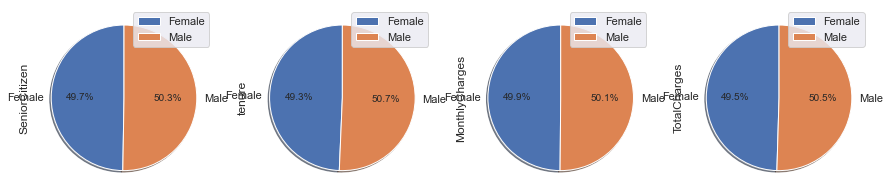

========================= Plotting PiePlot for :   Partner ===========================


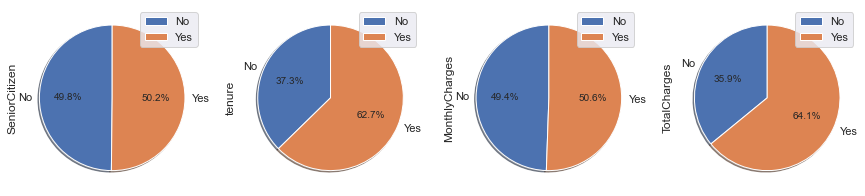

========================= Plotting PiePlot for :   Dependents ===========================


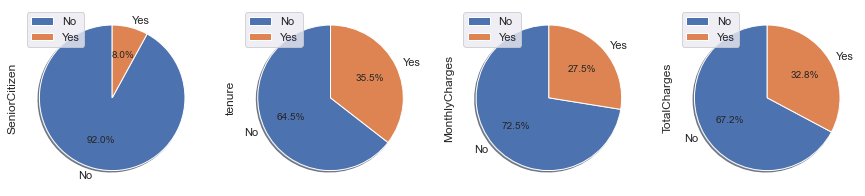

========================= Plotting PiePlot for :   PhoneService ===========================


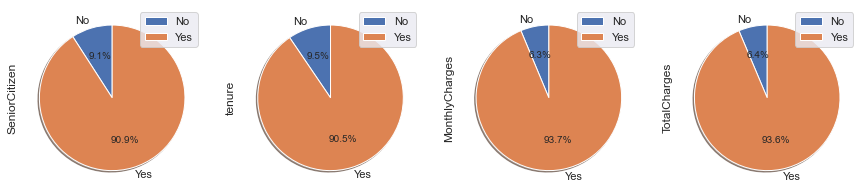

========================= Plotting PiePlot for :   MultipleLines ===========================


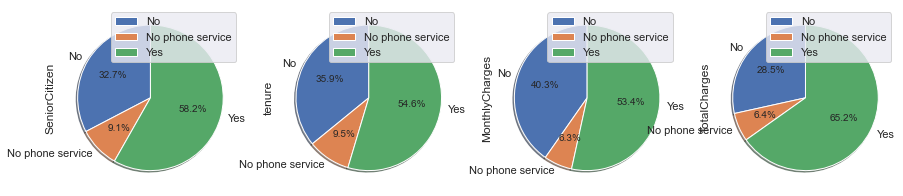

========================= Plotting PiePlot for :   InternetService ===========================


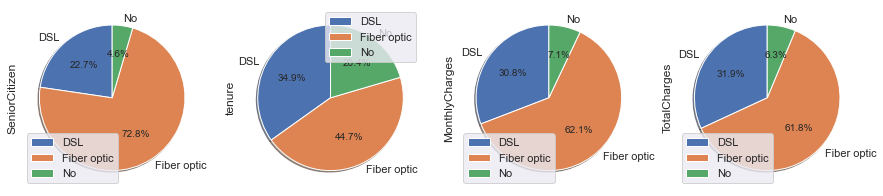

========================= Plotting PiePlot for :   OnlineSecurity ===========================


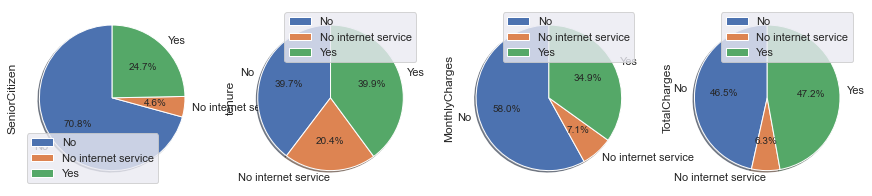

========================= Plotting PiePlot for :   OnlineBackup ===========================


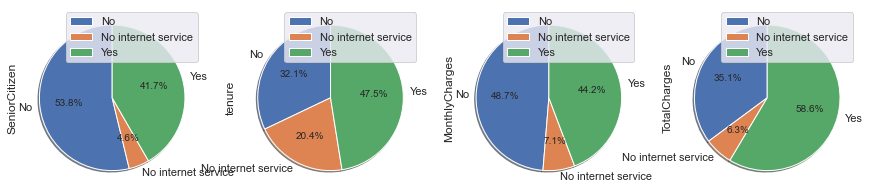

========================= Plotting PiePlot for :   DeviceProtection ===========================


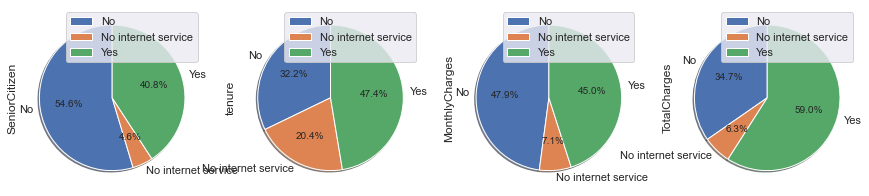

========================= Plotting PiePlot for :   TechSupport ===========================


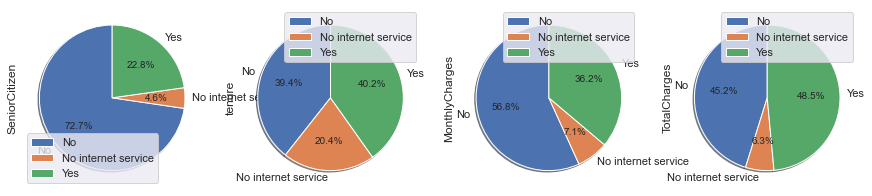

========================= Plotting PiePlot for :   StreamingTV ===========================


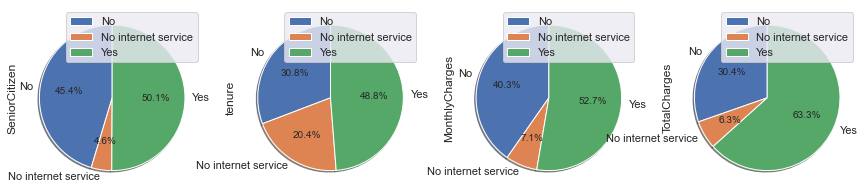

========================= Plotting PiePlot for :   StreamingMovies ===========================


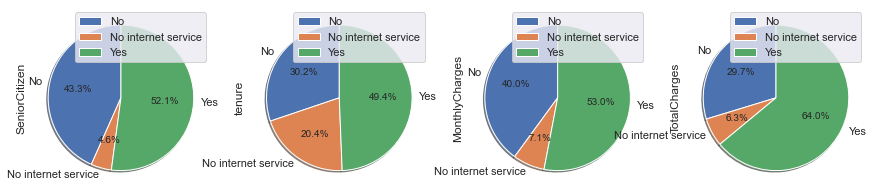

========================= Plotting PiePlot for :   Contract ===========================


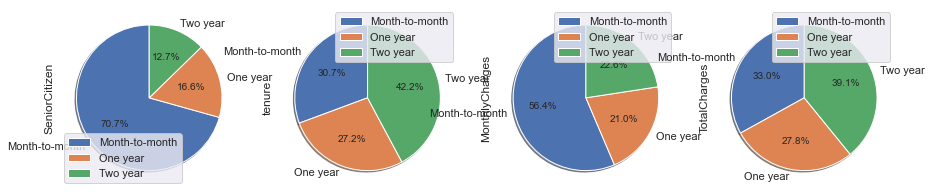

========================= Plotting PiePlot for :   PaperlessBilling ===========================


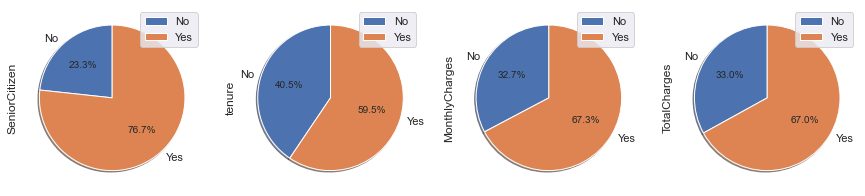

========================= Plotting PiePlot for :   PaymentMethod ===========================


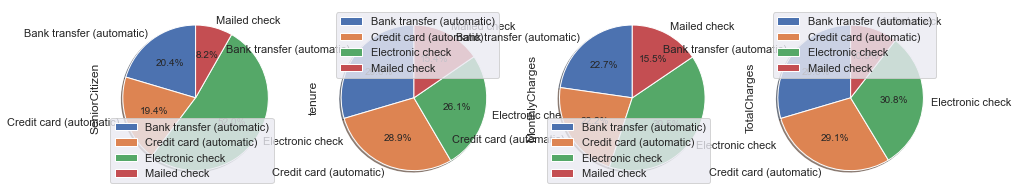

In [132]:
#Drawing Piechart
import time

def plotPieChart(dfplot, column):
    dfplot.groupby([column]).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(15,15), autopct='%1.1f%%')
    pyp.show()            

    
def drawPiechart(drawpie):
     for column in drawpie.columns: 
            if drawpie[column].dtype == 'object':  
                print ("========================= Plotting PiePlot for :  " , column , "===========================")
                plotPieChart(drawpie, column)
                time.sleep(1)
                
drawPiechart(Pie_df)                

#### 2D. Share insights for Q2.c. 
Solution 2D: 

1) The "gender"  distribution is faily balance between  SeniorCitizen, Tenure,  Monthly charges and Total Charges.

2) But for Features like "Partner", "Dependents", "PhoneService" the categorizatoin betweeenSeniorCitizen, Tenure,  Monthly charges and Total Charges is quite imbalance, except for few cases.

3) Looking at feature "MultipleLines", most people have multiple lines. Example 58.2 % of senior citizen has multiple Lines.  Simlar cases  for InternetService , where most people opt for Fibre.

4) Looking at the feature "OnlineSecurity", there is a concern as most prople does not have security. On the other hand  "DeviceProtection" looks quite OK.

5) Decent Percentage of users have "OnlineBackup" wiht max vlaue as 58.6%.

6) Looking at "TechSupport" most senior citizen doesn't use this feature.

7) Many user uses "StreamingTV" and "StreamingMovies" with as high as 64%. This matches with the Fibre connection.

8) The Type of "Contract" is mostly monthly for Senior Citizens.

9) Most people has adopted "PaperlessBilling" with as high as 76.7%, however "PaymentMethod" is mostly even distributed accross all modes of payment.


#### 2E. Encode all the appropriate Categorical features with the best suitable approach. [2 Marks] 
Solution 2E

In [133]:
#Converting objects to categorial variables 
for column in Master_df.columns: 
    if Master_df[column].dtype == 'object': 
        Master_df[column] = pd.Categorical(Master_df[column])#Replace with int 
Master_df.head(3)
Master_df.dtypes

customerID          category
gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure               float64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

In [134]:
#Generating the right values for imputing the data respectively .

replacedata = {
                "MultipleLines":     {"No": 0 ,"Yes": 1, "No phone service": -1 },    
                "OnlineSecurity": {"No": 0, "Yes":1 , "No internet service": -1 },
                "OnlineBackup": {"No": 0, "Yes":1 , "No internet service": -1 },
                "DeviceProtection": {"No": 0, "Yes":1 , "No internet service": -1 },
                "TechSupport": {"No": 0, "Yes":1 , "No internet service": -1 },
                "StreamingTV": {"No": 0, "Yes":1 , "No internet service": -1 },
                "StreamingMovies": {"No": 0, "Yes":1 , "No internet service": -1 },
                "Churn" : {"No": 0, "Yes":1 },
                "Partner" : {"No": 0, "Yes":1 },
                "Dependents" : {"No": 0, "Yes":1 },
                "PhoneService" : {"No": 0, "Yes":1 },
                "PaperlessBilling" : {"No": 0, "Yes":1 },  
                "gender" : {"Male": 0, "Female":1 }   
                 
            }
oneHotencode_col=["InternetService","Contract","PaymentMethod" ]

In [135]:
#Imputing the data.
Master_df=Master_df.replace(replacedata)
Master_df=pd.get_dummies(Master_df, columns=oneHotencode_col)

In [136]:
Master_df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,0,1.0,0,-1,0,1,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,0,34.0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,0,2.0,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1


In [137]:
Master_df.dtypes

customerID                                 category
gender                                        int64
SeniorCitizen                                 int64
Partner                                       int64
Dependents                                    int64
tenure                                      float64
PhoneService                                  int64
MultipleLines                                 int64
OnlineSecurity                                int64
OnlineBackup                                  int64
DeviceProtection                              int64
TechSupport                                   int64
StreamingTV                                   int64
StreamingMovies                               int64
PaperlessBilling                              int64
MonthlyCharges                              float64
TotalCharges                                float64
Churn                                         int64
InternetService_DSL                           uint8
InternetServ

#### 2F. Split the data into 80% train and 20% test. [1 Marks]
Solution 2F

In [138]:
#As we have to idetify the pattern of cutomer churn and not a particular  customer we could ignore the customerID attribute.
X = Master_df.drop(['customerID','Churn'], axis=1) 
Y = Master_df['Churn']

In [139]:
#Splitting the data 
x_train, x_test, y_train,y_test = train_test_split(X,Y, test_size = 0.20, random_state=1)
print ('x_train.shape:' , x_train.shape)
print ('x_test.shape:' , x_test.shape)

x_train.shape: (5634, 26)
x_test.shape: (1409, 26)


#### 2G. Normalize/Standardize the data with the best suitable approach. [2 Marks] 

In [140]:
#checking the imbalance in target 
print('y_train: \n', y_train.value_counts())
print('Y: \n', Y.value_counts())

y_train: 
 0    4113
1    1521
Name: Churn, dtype: int64
Y: 
 0    5174
1    1869
Name: Churn, dtype: int64


#####  It is quite prominent from here the that target varaiable is highly imbalance , there balancing the outcome for creating a better model. Using SMOTE to perform class balancing .

In [141]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train)

y_train_sm.value_counts()

0    4113
1    4113
Name: Churn, dtype: int64

##### Now the Training set is rightly balanced 

### 3. Model building and Improvement: [10 Marks]

A. Train a model using XGBoost. Also print best performing parameters along with train and test performance. [5 Marks]

B. Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance. [5 Marks] 

#### 3A. Train a model using XGBoost. Also print best performing parameters along with train and test performance. [5 Marks]
Solution 3A:


In [143]:
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

xgbst = XGBClassifier()
xgbst.fit(x_train_sm, np.ravel(y_train_sm)) 

[14:24:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [151]:
#Getting Score 
xgbst.score(x_train_sm, y_train_sm)

0.9613420860685631

In [152]:
xgbst.score(x_test,y_test)

0.7856635911994322

In [153]:
#Getting the Predicted value
predict = xgbst.predict(x_test)

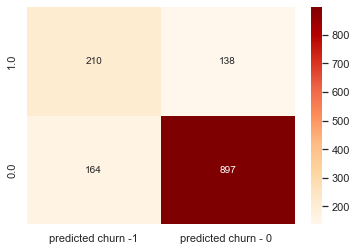

In [154]:
#Here it is quite noticable that the accuracy of this model is quite low. 
#plotting a confusion Martix
cf_mx = metrics.confusion_matrix(y_test, predict, labels=[1,0])
df_cfmx = pd.DataFrame(cf_mx, index =[i for i in [1.0,0.0]], columns= [i for i in ['predicted churn -1','predicted churn - 0 ']])
sns.heatmap(df_cfmx, annot=True, fmt='g', cmap="OrRd");

In [155]:
#Printing the Evaluation Matics
print (metrics.classification_report(y_test,  predict))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1061
           1       0.56      0.60      0.58       348

    accuracy                           0.79      1409
   macro avg       0.71      0.72      0.72      1409
weighted avg       0.79      0.79      0.79      1409



#### From the above observations the accurcy is not very high compared to the train model.  Also There is a significant difference between the Precision , recall and f1-score for the the outcome of '0' and '1'. Some fine tuning is needed. 

####  3B. Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance. [5 Marks]
Solution 3B:

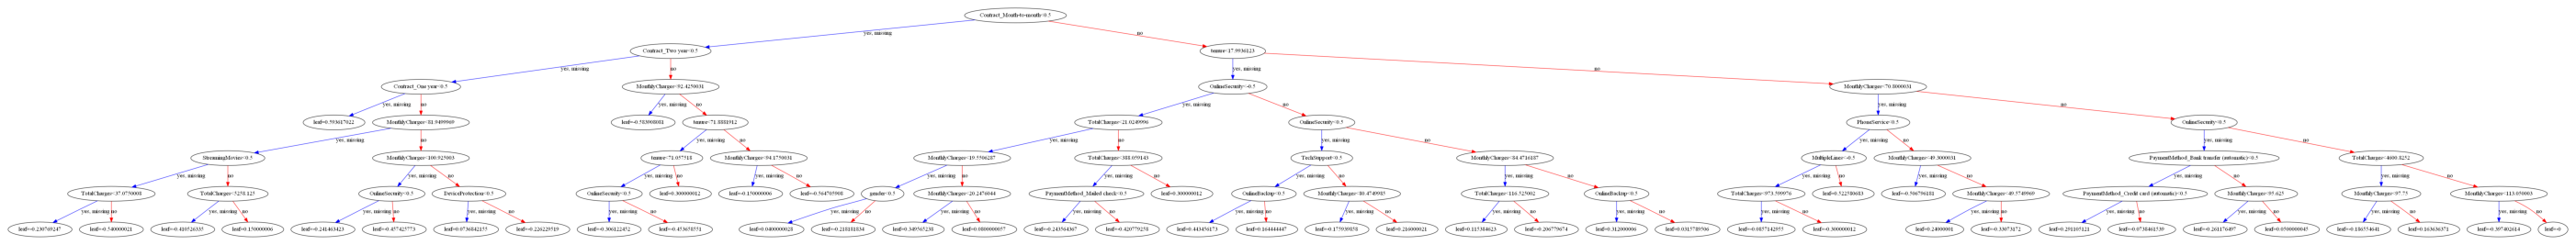

In [156]:
#Before we start Enhancing the Model see how the tree looks like
from sklearn.tree import export_graphviz
from xgboost import plot_tree
fig, ax = pyp.subplots(figsize=(50, 100))
plot_tree(xgbst, ax=ax)
pyp.show();

In [54]:
# We need to prune the tree a little bit to increse the model performance.

In [158]:
#Apply Zscore to normalize
from scipy.stats import zscore
x_copy = X
x_scaled = x_copy.apply(zscore)
xgbst2 = XGBClassifier()
xs_train, xs_test, ys_train, ys_test = train_test_split(x_scaled, Y, test_size=0.20 , random_state=1)
xgbst2.fit(xs_train, ys_train)


[14:25:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [159]:
xgbst2.score(xs_test,ys_test)

0.7934705464868701

##### The accuracy performance have improved after the normalizataion . 

In [160]:
#Applying some parameter tuning to improve the model performance.
#After some trial witout using gridsearchCV, the following parameter gave a comsiderable improvement.
xgbst3 = XGBClassifier( max_depth= 5, gamma = 1)
eval_set = [(xs_test, ys_test)]
xgbst3.fit(xs_train, np.ravel(ys_train), eval_metric='auc' , early_stopping_rounds=10, eval_set=eval_set, verbose=True)
xgbst3.score(xs_test, ys_test)

[0]	validation_0-auc:0.83185
[1]	validation_0-auc:0.84345
[2]	validation_0-auc:0.84303
[3]	validation_0-auc:0.84520
[4]	validation_0-auc:0.84766
[5]	validation_0-auc:0.84993
[6]	validation_0-auc:0.85188
[7]	validation_0-auc:0.85259
[8]	validation_0-auc:0.85310
[9]	validation_0-auc:0.85267
[10]	validation_0-auc:0.85271
[11]	validation_0-auc:0.85242
[12]	validation_0-auc:0.85232
[13]	validation_0-auc:0.85303
[14]	validation_0-auc:0.85286
[15]	validation_0-auc:0.85165
[16]	validation_0-auc:0.85115
[17]	validation_0-auc:0.85128


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18]	validation_0-auc:0.85252


0.8126330731014905

#### Accuracy have increase by 3 units

In [161]:
predicty = xgbst3.predict(xs_test)
predicty

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [162]:
print (metrics.classification_report(y_test,  predicty))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1061
           1       0.64      0.56      0.60       348

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409



#### The Performance Parameter looks very similar to previous measurement with slight improvements in Precision and f1-score. But recall  reduce a bit.

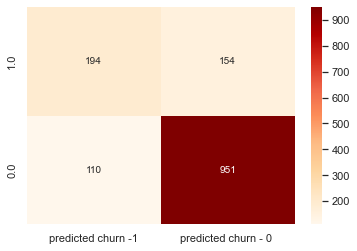

In [163]:
#printing the confusion matrix for the improve version .
#plotting a confusion Martix
cf_mx1 = metrics.confusion_matrix(y_test, predicty, labels=[1,0])
df_cfmx1 = pd.DataFrame(cf_mx1, index =[i for i in [1.0,0.0]], columns= [i for i in ['predicted churn -1','predicted churn - 0 ']])
sns.heatmap(df_cfmx1, annot=True, fmt='g', cmap="OrRd");

#### Overall after  applying normalization and parameter tuning the overall  performance matrix improves and following model can be used.  
xgbst3 = XGBClassifier( max_depth= 5, gamma = 1)

xgbst3.fit(xs_train, np.ravel(ys_train), eval_metric='auc' , early_stopping_rounds=10, eval_set=eval_set, verbose=True)


### Part B . CONTEXT: The purpose is to build a machine learning workflow that will work autonomously irrespective of Data and users can save efforts involved in building workflows for each dataset

PROJECT OBJECTIVE: Build a machine learning workflow that will run autonomously with the csv file and return best performing model.

####  Solution : 
The Program will be seggregated into following main steps. 
1) Datacollection

2) EDA or data preparation 

3) Model selection based on base model

4) Tuning for the Best model 

5) return the model and save in picke file. 

#### Creating a class DataCollector with functions to perform all DataCollection activity. 

In [164]:
#This class will encapsulate all the Data collection funtions. 
class DataCollector:
    #Function to read input from CSV
    def readinput (self, filename):
        if filename is not None:
            inputdf_Local = pd.read_csv(filename)
            print ('Input file',filename, 'read')
            return inputdf_Local
    #Function to print the shape of the Dataframe
    def getshape (self, df):
        print ('========== Data Shape ========= ', df.shape)
    #Function to print the statistical data of the Dataframe.
    def getdetails(self, df):
        print ('=========== Data details======== :  \n ', df.describe().T)
    

#### Creating a class EDA with functions to perform all Exploratory Data Analysis and necessary clean up and imputing. 

In [165]:
#This class will encapsulte all the functions which will be used for Exploratory Data Analysis.
class EDA:
    #This function will find null value if any
    def findandreplacenull(self, df):
        for column in df.columns:
            if (df[column].isnull().sum() > 0 ):
                print ('There are null values needs replacement')
                replacenull(df[column])
            else:
                print ('== No null values for feature :', column)
                
    #This funciton will replace the null to appropriate value based on the datatype            
    def replacenull(dfnull):
        print ('replacing null vlaue')
        if ((dfnull.dtypes == 'int') or  (dfnull.dtypes == 'float' )):
            dfnull[dfnull  == null] = dfnull.mean()
        elif((dfnull.dtypes == 'object') or  (dfnull.dtypes == 'category' )):
            dfnull.fillna(dfnull.mode(), inplace=True)
            
    #This function will replace unwanted values like '',?, -, _ etc , this can be extended as we continue the project.
    def replaceunwantedvalues(self, df):
        print ('=============== checking for space or unwanted special characters =========')
        for column in df.columns:
            #check if there are any spaace in the column
            spacecount = df.loc[df[column] == ' ', column]
            if (spacecount.count() > 0):
                print ('There are spaces in the :' , column,  "replacing with 0")
                df.loc[df[column] == ' ', column] = '0.0'
            else:
                print ('No spaces found in the feature : ', column)
            #Similarly we can do for other chracters or put a regex.
       
    #This function will convert the some of the features to numerical values. 
    def objtonumber (self, df):
        #print ('COnverting few features to nummerical values')
        df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
        
    #This function will handle the outliers
    def handleoutliers(self,df):
        for column in df.columns:
            if ((df[column].dtypes == 'int') or  (df[column].dtypes == 'float' )):
                Q3 = df[column].quantile(.75)
                Q1 = df[column].quantile(.25)
                #calculating IQR
                IQR  = Q3 - Q1
                Max_allowed = Q3 +  1.5*IQR
                Min_allowed = Q1 -  1.5*IQR
                df.loc[(df[column] > Max_allowed ),column] = Max_allowed
                df.loc[(df[column] < Min_allowed ),column] = Min_allowed
    
    #This function will put up  a box  plot to present the data distribution.
    def plot(self, df):
        pyp.figure(figsize=(20, 10))
        df.boxplot()
        pyp.show()
        #Like wise other plot can be included.
        
    
    #This function will impute the data  accordigly. 
    def imputedata(self,df):
        for column in df.columns: 
            if df[column].dtype == 'object': 
                df[column] = pd.Categorical(df[column])
                
         #This function will convert the data as per the data set recieved , this will be done only once whenever the
         #data set changes its Schema. In the normal workflow as long as the data set schema remains the same this function need not be modified.
        
        #creating a Dictionary to replace the values
        replacedata2 = {
                "OnlineBackup": {"No": 0, "Yes":1 , "No internet service": -1 },
                "DeviceProtection": {"No": 0, "Yes":1 , "No internet service": -1 },
                "TechSupport": {"No": 0, "Yes":1 , "No internet service": -1 },
                "StreamingTV": {"No": 0, "Yes":1 , "No internet service": -1 },
                "StreamingMovies": {"No": 0, "Yes":1 , "No internet service": -1 },
                "PaperlessBilling" : {"No": 0, "Yes":1 },  
                "Churn" : {"No": 0, "Yes":1 } 
            }
        #creting a list of  features for one hot encoding.
        oneHotencode_col2=["Contract","PaymentMethod"]
        #Imputing the data.
        df=df.replace(replacedata2)
        df=pd.get_dummies(df, columns=oneHotencode_col2)
        
        return df
    

#### Creating a class  ModelSelect with functions to perfrom the following.
#### 1) Perform base models trainging 
#### 2)  Find the best model
#### 3) Select the Model and perform parameter tunig.
#### 4) Save the model on a pickle file.

In [166]:
#This class excapsulate all the functions which functions which will 
# 1) Perform base models trainging 
# 2)  Find the best model
# 3) Select the Model and perform parameter tunig.
# 4) Save the model on a pickle file.

class ModelSelect:
    
    #This function will generate the X and Y.
    def splitXY(self,df):
        X = df.drop(['customerID','Churn'], axis=1) 
        Y =df['Churn']
        return X,Y
    
    #This function will  perform the train,test split
    def prepareTrainTest(self, X, Y ):
        x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
        return x_train,x_test,y_train,y_test
    
    #This funtion will prepare the base models
    def buildModels(self):
        #creating objects for the classificaiton models.
        self.svm = SVC()
        self.knn = KNeighborsClassifier()        
        self.dct = DecisionTreeClassifier(random_state=1)   
        self.bg =  BaggingClassifier(random_state=1)
        self.rfc = RandomForestClassifier(random_state=1, n_estimators=100)
        self.gbc = GradientBoostingClassifier(random_state=1, n_estimators=100)
   
    #This function will fit the data to the base models  respectively and return the performance metrices.
    def fitmodel(self, model,name, x_train, x_test,y_train, y_test):
        #fitting the model 
        model.fit(x_train,y_train)
        predict = model.predict(x_test)
        score  = model.score(x_test,y_test)
        metrics.confusion_matrix(y_test, predict, labels=[1,0])
        perf_metrics= metrics.classification_report(y_test, predict)
        
        #Generating the output in a presentable manner by parsing the "classification_report".
        prefDict = { 'model' : name , 'score' : score , 'precision- 0' : perf_metrics[74:78], 'Recall- 0' : perf_metrics[84:88]
                    ,'f1score -0' : perf_metrics[94:98] ,'precision- 1' : perf_metrics[128:133],
                     'Recall- 1' : perf_metrics[138:144] , 'f1score -1' : perf_metrics[148:153]} 

        return prefDict
   

    #This function will  run the base models and get the performance stats we well.
    def executeBaseModels(self, x_train,x_test,y_train,y_test):
        #Create a dictionary to store the results
        self.results = {}
        self.dfresult = pd.DataFrame()
        
        for model, name  in zip([self.svm, self.knn, self.dct, self.bg, self.rfc , self.gbc ], ['Support Vector machine',
                                'K Nearest Neighbour', 'DecisionTree' , 'Bagging' , 'Random Forest' , 'Gradient Boost']):
            self.results = self.fitmodel(model, name,x_train, x_test,y_train, y_test)  
            #print ('============== Peformance Metrics : ', name , '=========' )
            #print (self.results)
            #create a dataframe for the results
            self.dfresult = self.dfresult.append(self.results, ignore_index=True)
        #print (self.dfresult)    
        return self.dfresult

    
    #This function will find the best model as per the score.
    def findBestModels(self, dataFrame):
        score_sorted_df = dataFrame.sort_values(by='score', ascending=False)
        bestscore = score_sorted_df.head(1)
        return bestscore
   

    #This function will print the best model. 
    def  printBestModel(self, BestModel):
        print ('=============================================BEST MODEL ===============================================================')
        print ('The Best base model is:-' ,  BestModel['model'].to_string(index=False))
        print ('The Score with Test data is :' , BestModel['score'].to_string(index=False))
        print ('Precision 0: ', BestModel['precision- 0'].to_string(index=False) , 'Precision 1:', BestModel['precision- 1'].to_string(index=False) )
        print ('Recall 0: ', BestModel['Recall- 0'].to_string(index=False) , 'Recall 1:', BestModel['Recall- 1'].to_string(index=False))
        print ('f1 score 0: ', BestModel['f1score -0'].to_string(index=False) , 'f1 score 1:', BestModel['f1score -1'].to_string(index=False))
       
    #This Function is to improve the selected model.
    def improveModel(self, x_train,y_train, x_test, y_test, modelname):
        #For now this function handles only gradient boost but it can be extended to handle all the models in consideration.
        parameters = {
            "loss":["deviance"],
            "learning_rate": [0.01, 0.025, 0.05],
            "max_depth":[3,5],
            "max_features":["log2","sqrt"],
            "n_estimators":[100]
            }
        self.clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1)
        self.clf.fit(x_train, y_train)
    
        print('Improved accuracy: ' , self.clf.score(x_test, y_test))
        #print and return the best parameter of the selected model
        print(self.clf.best_params_)    
        return self.clf.best_params_
        
    #This funtions will save the model as a Pickel  file    
    def saveToPickel(self):
        with open('pickle1.model', 'wb') as file:
            pickle.dump (self.gbc, file)
            print ('========Model written to pickle file =============== ')
            


#### Grouping the function class instance and function calls for better  workflow  understandability. 

In [168]:
#This initates the Data collection
def collectData(dataset):
    #Creating an instance of DataCollector class
    datacollection  = DataCollector()
    inputdf=datacollection.readinput(dataset)
    datacollection.getshape(inputdf)
    datacollection.getdetails(inputdf)
    return inputdf

#This function will perform EDA    
def performEDA(inputdf):
    #Creating an instance of EDA class
    eda = EDA()
    eda.findandreplacenull(inputdf)
    eda.replaceunwantedvalues(inputdf)
    eda.objtonumber(inputdf)
    eda.handleoutliers(inputdf)
    eda.plot(inputdf)
    inputdf2 = eda.imputedata(inputdf)
    return inputdf2

#This function will compare all the best model and select the best model. The Best model is tund to get better model.    
def getBestModel(inputdf2):  
    #Creating an instance of ModelSelect class
    modelselect = ModelSelect()
    #splitting the dataset into X,Y
    X, Y = modelselect.splitXY(inputdf2)
    #splitting the dataset into Xtrain,Ytrain etc
    x_train,x_test,y_train,y_test = modelselect.prepareTrainTest(X, Y)
    #Internal Datasructure consistency check.
    modelselect.buildModels()
    #train the base models
    result_df = modelselect.executeBaseModels(x_train,x_test,y_train,y_test)
    print (result_df)
    #Get the Best Model
    BestModel = modelselect.findBestModels(result_df)
    #print the Best Model and the respective performance output.
    modelselect.printBestModel(BestModel)
    #Improving the best model
    BestParams=modelselect.improveModel(x_train, y_train,  x_test , y_test, BestModel)
    
    #Save the model to Pickle file.
    modelselect.saveToPickel()
    

### Running the workflow by by calling 3 main functions.

#### Printing the results of the workflow execution. Workflow executiong ends with "========Model written to pickle file ===============".

#### In an inustrial scenario only these 3 functions will be exposed and SME or users need to provide the .csv file in the proper schema , call the functions as specified  and they will  get their output. 

Input file TelcomCustomer-Churn_2.csv read
========== Data Shape =========  (7043, 12)
=========== Data details======== :  
                   count       mean        std    min   25%    50%    75%  \
MonthlyCharges  7043.0  64.761692  30.090047  18.25  35.5  70.35  89.85   

                   max  
MonthlyCharges  118.75  
== No null values for feature : customerID
== No null values for feature : OnlineBackup
== No null values for feature : DeviceProtection
== No null values for feature : TechSupport
== No null values for feature : StreamingTV
== No null values for feature : StreamingMovies
== No null values for feature : Contract
== No null values for feature : PaperlessBilling
== No null values for feature : PaymentMethod
== No null values for feature : MonthlyCharges
== No null values for feature : TotalCharges
== No null values for feature : Churn
=============== checking for space or unwanted special characters =========
No spaces found in the feature :  customerID
No spaces fou

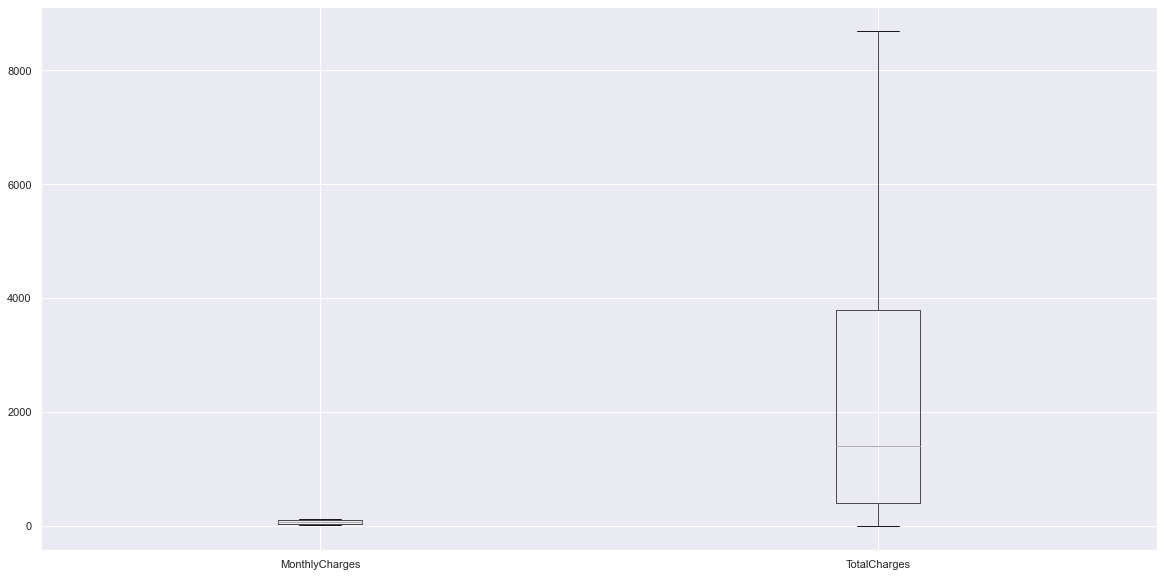

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    model     score precision- 0 Recall- 0 f1score -0  \
0  Support Vector machine  0.753016         0.75      1.00       0.86   
1     K Nearest Neighbour  0.758694         0.83      0.86       0.84   
2            DecisionTree  0.738112         0.83      0.82       0.82   
3                 Bagging  0.794180         0.85      0.89       0.87   
4           Random Forest  0.786373         0.85      0.87       0.86   
5          Gradient Boost  0.811923         0.86      0.90       0.88   

  precision- 1 Recall- 1 f1score -1  
0        0.00     0.00        0.00   
1        0.51     0.46        0.48   
2        0.47     0.50        0.49   
3        0.60     0.51        0.55   
4        0.57     0.52        0.55   
5        0.64     0.56        0.59   
=============================================BEST MODEL ===============================================================
The Best base model is:- Gradient Boost
The Score with Test data is : 0.811923
Precision 0:  0.86 Prec

In [169]:
#Calling the process flow one API at a time. 

#Using the data set "TelcomCustomer-Churn_2.csv".
inputdf = collectData('TelcomCustomer-Churn_2.csv')

inputdf2 = performEDA(inputdf)

getBestModel(inputdf2)